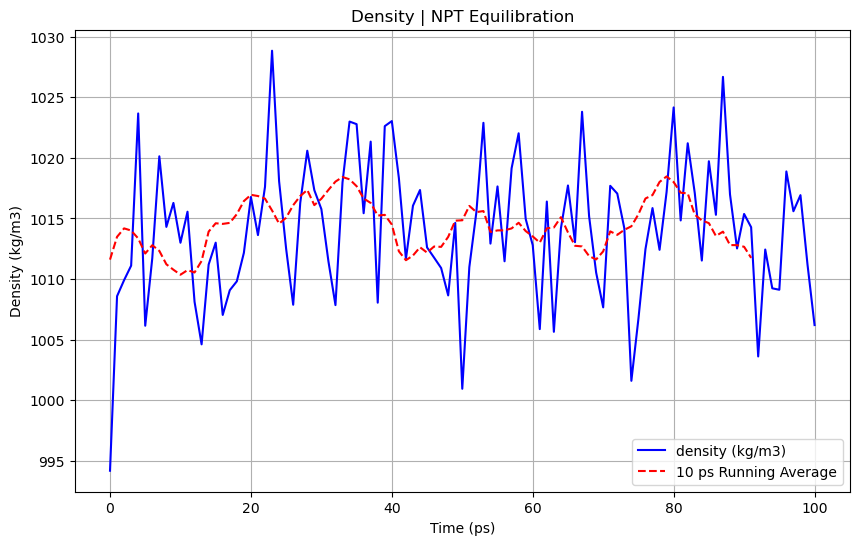

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_density_vs_time_with_10ps_average(density_VS_time, save_path=None, ps_window=10):
    # Reading the file
    with open(density_VS_time, 'r') as file:
        lines = file.readlines()
    
    # Extracting the numerical data, skipping lines that start with "#" or "@"
    data = []
    for line in lines:
        if not line.startswith(('#', '@')):
            data.append([float(value) for value in line.split()])
    
    # Converting the data into a numpy array
    data = np.array(data)
    
    # Extracting time (ps) and density (kd/m3)
    time_ps = data[:, 0]
    density = data[:, 1]
    
    # Calculate the time interval between points
    time_interval = np.mean(np.diff(time_ps))
    
    # Calculate the number of data points corresponding to the 10 ps window
    window_size = int(ps_window / time_interval)
    
    # Calculate running average (simple moving average over 10 ps window)
    running_avg = np.convolve(density, np.ones(window_size)/window_size, mode='valid')
    
    # Adjust time for running average to match the shortened array
    time_avg = time_ps[:len(running_avg)]
    
    # Plotting the data
    plt.figure(figsize=(10,6))
    plt.plot(time_ps, density, label='density (kg/m3)', color='blue')
    plt.plot(time_avg, running_avg, label=f'10 ps Running Average', color='red', linestyle='--')
    plt.title('Density | NPT Equilibration')
    plt.xlabel('Time (ps)')
    plt.ylabel('Density (kg/m3)')
    plt.grid(True)
    plt.legend()

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, format='png')
    
    # Show the plot
    plt.show()

# Using the function, specifying a save path for the image
plot_density_vs_time_with_10ps_average("/scratch/work/courses/CHEM-GA-2671-2024fa/students/st5423/comp-lab-class-2024/Week3-IntroToMD/Input/density.xvg", save_path='/scratch/work/courses/CHEM-GA-2671-2024fa/students/st5423/comp-lab-class-2024/Week3-IntroToMD/Figures/density_vs_time.png')
